# Plant Leaf Classification

Applying machine learning models for classification of plant leaf images

### Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import os
import string

### Reading the dataset

In [4]:
dataset = pd.read_csv("MAJOR.csv")

In [5]:
dataset

,Unnamed: 0,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,2720548.0,7093.779454,2185,1923,1.136245,1.544452,18.496901,175.422947,174.491910,152.287766,54.742162,47.526391,73.123473,9.332967,0.998307,0.412868,9.786245
1,0,3236207.0,7833.180593,1742,2910,0.598625,1.566408,18.960072,173.383629,173.635191,147.298171,59.620965,52.062883,78.682088,9.002314,0.998628,0.401363,9.953432
2,0,4004079.0,7937.671805,2233,2288,0.975962,1.275975,15.735612,166.907685,168.155174,137.364853,65.463742,57.015254,85.737864,7.686358,0.999024,0.431449,9.766508
3,0,3601065.5,8576.678071,1732,3285,0.527245,1.579982,20.427123,165.455155,165.719658,138.445994,58.581270,50.441720,78.786882,9.139080,0.998544,0.394996,9.891589
4,0,3471506.5,8028.913572,2554,2026,1.260612,1.490536,18.569302,168.422521,169.271163,143.087844,59.940583,52.470042,80.232598,9.162804,0.998628,0.395314,10.028587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,0,3547726.0,7351.072949,1960,2446,0.801308,1.351333,15.231806,163.790237,169.526623,143.705761,67.195346,55.816134,85.441197,7.446277,0.999050,0.418858,9.507663
1878,0,2512418.0,6376.676860,1622,2157,0.751970,1.392545,16.184412,174.693337,177.509541,156.104451,59.745474,49.330552,74.987792,8.714702,0.998577,0.398861,9.681560
1879,0,3459284.5,7449.124682,2006,2364,0.848562,1.370857,16.040733,164.041674,168.708603,142.031868,65.277439,53.419778,82.639604,8.034160,0.998896,0.403949,9.506496
1880,0,2988973.5,7193.301311,1469,2819,0.521107,1.385463,17.311490,172.596229,175.141883,149.833681,64.860522,52.874197,79.995718,7.953245,0.998878,0.433264,9.465607


In [6]:
dataset.head(5)

,Unnamed: 0,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,2720548.0,7093.779454,2185,1923,1.136245,1.544452,18.496901,175.422947,174.491910,152.287766,54.742162,47.526391,73.123473,9.332967,0.998307,0.412868,9.786245
1,0,3236207.0,7833.180593,1742,2910,0.598625,1.566408,18.960072,173.383629,173.635191,147.298171,59.620965,52.062883,78.682088,9.002314,0.998628,0.401363,9.953432
2,0,4004079.0,7937.671805,2233,2288,0.975962,1.275975,15.735612,166.907685,168.155174,137.364853,65.463742,57.015254,85.737864,7.686358,0.999024,0.431449,9.766508
3,0,3601065.5,8576.678071,1732,3285,0.527245,1.579982,20.427123,165.455155,165.719658,138.445994,58.581270,50.441720,78.786882,9.139080,0.998544,0.394996,9.891589
4,0,3471506.5,8028.913572,2554,2026,1.260612,1.490536,18.569302,168.422521,169.271163,143.087844,59.940583,52.470042,80.232598,9.162804,0.998628,0.395314,10.028587


In [7]:
type(dataset)

pandas.core.frame.DataFrame

In [8]:
maindir = r'D:\Leaves'
img_files = os.listdir(maindir)

### Creating target labels

Breakpoints are used alongside the image file to create a vector of target labels. The breakpoints are solely made by us.

In [9]:
breakpoints = ['AA-001','AA-044','AI-001','AI-044','AIA-001','AIA-044','AM-001','AM-086','AP-001','AP-044','AV-001','AV-044','CA-001','CA-044','CAB-001','CAB-086','CH-001','CH-099','CQ-001','CQ-065','CR-001','CR-044','CT-001','CT-040','FB-001','FB-044','FR-001','FR-044','GS-001','GS-088','HI-001','HI-088','HR-001','HR-086','LA-001','LA-062','MI-001','MI-044','MK-001','MK-065','MP-001','MP-043','MT-001','MT-042','NO-001','NO-044','RT-001','RT-044','SR-001','SR-065','ST-001','ST-044','STL-001','STL-044','TA-001','TA-088','TC-001','TC-044','VN-001','VN-087','WC-001','WC-044','WT-001','WT-088']

In [10]:
target_list = []
for file in img_files:
    target_num = str(file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        target_list.append(target)

In [11]:
y = np.array(target_list)
y

array([ 0,  0,  0, ..., 31, 31, 31])

In [12]:
X = dataset.iloc[:,1:]

In [13]:
X.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,2720548.0,7093.779454,2185,1923,1.136245,1.544452,18.496901,175.422947,174.491910,152.287766,54.742162,47.526391,73.123473,9.332967,0.998307,0.412868,9.786245
1,3236207.0,7833.180593,1742,2910,0.598625,1.566408,18.960072,173.383629,173.635191,147.298171,59.620965,52.062883,78.682088,9.002314,0.998628,0.401363,9.953432
2,4004079.0,7937.671805,2233,2288,0.975962,1.275975,15.735612,166.907685,168.155174,137.364853,65.463742,57.015254,85.737864,7.686358,0.999024,0.431449,9.766508
3,3601065.5,8576.678071,1732,3285,0.527245,1.579982,20.427123,165.455155,165.719658,138.445994,58.581270,50.441720,78.786882,9.139080,0.998544,0.394996,9.891589
4,3471506.5,8028.913572,2554,2026,1.260612,1.490536,18.569302,168.422521,169.271163,143.087844,59.940583,52.470042,80.232598,9.162804,0.998628,0.395314,10.028587


In [14]:
y[0:5]

array([0, 0, 0, 0, 0])

In [15]:
X.shape

(1882, 17)

In [16]:
y

array([ 0,  0,  0, ..., 31, 31, 31])

In [17]:
y.shape

(1882,)

### Train test split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 150)

In [20]:
X_train.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
1231,38.5,25.556349,10,8,1.250000,2.077922,16.964337,194.858812,191.911236,181.863633,34.809182,33.294240,37.022518,22.849149,0.990186,0.312255,10.069319
138,14.5,15.071068,5,6,0.833333,2.068966,15.664626,188.506163,186.108987,171.099081,47.095569,40.520784,56.779588,19.193600,0.995104,0.291458,10.133033
1290,1550881.0,8131.219256,3377,1539,2.194282,3.351129,42.631721,183.912348,180.874941,165.681293,49.891362,44.386409,57.805109,20.223334,0.995524,0.303615,10.270597
1097,2157367.5,7211.002766,1083,3114,0.347784,1.563230,24.102783,178.713918,177.977039,158.446665,55.632217,48.125594,67.335208,13.529281,0.997545,0.371395,9.459341
460,39.0,23.313708,8,8,1.000000,1.641026,13.936641,197.193413,195.650032,183.622883,33.506241,29.413982,37.141529,13.575435,0.993147,0.315524,9.860702


In [21]:
y_train[0:5]

array([20,  3, 22, 18,  8])

### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [24]:
X_train[0:2]

array([[-0.9874969 , -1.25440417, -1.1311896 , -1.16481727,  0.2325122 ,
        -0.03980867, -0.34604666,  1.20829224,  1.22448575,  1.48774055,
        -0.96459021, -0.76448183, -1.37340811,  0.13494334, -1.64731904,
        -0.65870971,  0.18497419],
       [-0.9875174 , -1.25745764, -1.13645287, -1.16652328, -0.21355134,
        -0.04509375, -0.38729724,  0.70120807,  0.6873105 ,  0.68355993,
        -0.00872821, -0.11339623, -0.08475603, -0.01169259,  0.01139082,
        -1.11487593,  0.35895384]])

In [25]:
y_train[0:2]

array([20,  3])

## Applying Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
import joblib
joblib.dump(model, "./leaf_rf.joblib")

['./leaf_rf.joblib']

In [35]:
model = joblib.load("./leaf_rf.joblib")

In [36]:
y_pred=model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8743362831858407

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.75      0.80      0.77        15
           2       1.00      0.86      0.92        14
           3       0.89      0.81      0.85        21
           4       0.90      1.00      0.95        19
           5       0.85      0.58      0.69        19
           6       0.71      1.00      0.83        12
           7       1.00      1.00      1.00        27
           8       0.79      0.72      0.75        32
           9       1.00      0.86      0.93        22
          10       0.88      0.93      0.90        15
          11       0.91      0.83      0.87        12
          12       1.00      1.00      1.00         7
          13       0.88      0.58      0.70        12
          14       0.96      1.00      0.98        25
          15       1.00      0.92      0.96        26
          16       1.00      0.92      0.96        24
          17       0.78    

## SVM

In [39]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)
y2 = clf.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y2)

0.7097345132743362

In [155]:
 print(classification_report(y_test, y2))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.79      0.69      0.73        16
           2       0.41      0.75      0.53        12
           3       0.65      0.79      0.71        19
           4       0.94      0.76      0.84        21
           5       0.28      0.38      0.32        13
           6       0.77      0.59      0.67        17
           7       0.84      1.00      0.92        27
           8       0.61      0.79      0.69        29
           9       0.78      0.74      0.76        19
          10       0.67      0.50      0.57        16
          11       1.00      0.27      0.43        11
          12       1.00      1.00      1.00         7
          13       0.29      0.50      0.36         8
          14       1.00      0.96      0.98        26
          15       0.71      0.92      0.80        24
          16       0.77      0.91      0.83        22
          17       0.81    

## KNN


In [156]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
knn = OneVsRestClassifier(GaussianNB())
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [157]:
%time
# 98%
print('KNN Accuracy: %.3f' % accuracy_score(y_test,predictions))

Wall time: 0 ns
KNN Accuracy: 0.655


In [158]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix,classification_report

print("Confusion matrix")
cm = confusion_matrix(y_test, predictions)
print(cm)
# predictions.shape
# y_test.shape

Confusion matrix
[[10  0  0 ...  0  0  2]
 [ 2 12  0 ...  0  0  0]
 [ 0  0  9 ...  1  1  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  2 ...  0 10  0]
 [ 3  0  0 ...  0  0 19]]


In [159]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71        12
           1       0.92      0.75      0.83        16
           2       0.43      0.75      0.55        12
           3       0.60      0.63      0.62        19
           4       1.00      0.81      0.89        21
           5       0.47      0.54      0.50        13
           6       0.92      0.65      0.76        17
           7       0.88      0.52      0.65        27
           8       0.65      0.59      0.62        29
           9       0.54      0.74      0.62        19
          10       0.93      0.81      0.87        16
          11       0.21      0.64      0.31        11
          12       1.00      1.00      1.00         7
          13       0.40      0.75      0.52         8
          14       0.89      0.92      0.91        26
          15       0.62      0.67      0.64        24
          16       0.58      0.50      0.54        22
          17       0.72    

## Gaussian Naive Bayes

In [160]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print(classification_report(y_test, y2))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.79      0.69      0.73        16
           2       0.41      0.75      0.53        12
           3       0.65      0.79      0.71        19
           4       0.94      0.76      0.84        21
           5       0.28      0.38      0.32        13
           6       0.77      0.59      0.67        17
           7       0.84      1.00      0.92        27
           8       0.61      0.79      0.69        29
           9       0.78      0.74      0.76        19
          10       0.67      0.50      0.57        16
          11       1.00      0.27      0.43        11
          12       1.00      1.00      1.00         7
          13       0.29      0.50      0.36         8
          14       1.00      0.96      0.98        26
          15       0.71      0.92      0.80        24
          16       0.77      0.91      0.83        22
          17       0.81    

# Testing with mobile captured leaves which are not classified

In [162]:
import os
import cv2

In [171]:
def bg_sub(filename):
    test_img_path = 'D:\Dataset ITWWS\\' + filename
    main_img = cv2.imread(test_img_path)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(img, (1600, 1200))
    size_y,size_x,_ = img.shape
    gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (55,55),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    
    contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in contours:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    index = val[0]
    
    black_img = np.empty([1200,1600,3],dtype=np.uint8)
    black_img.fill(0)
    
    cnt = contours[index]
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
    
    maskedImg = cv2.bitwise_and(resized_image, mask)
    white_pix = [255,255,255]
    black_pix = [0,0,0]
    
    final_img = maskedImg
    h,w,channels = final_img.shape
    for x in range(0,w):
        for y in range(0,h):
            channels_xy = final_img[y,x]
            if all(channels_xy == black_pix):
                final_img[y,x] = white_pix
    
    return final_img

In [172]:
filename = 'AA.jpg' 
bg_rem_img = bg_sub(filename)
type(filename)

IndexError: list index out of range

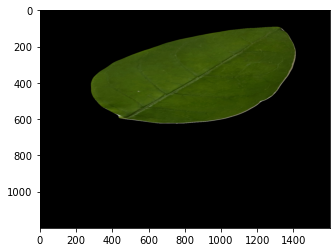

In [173]:
import matplotlib.pyplot as plt
plt.imshow(bg_rem_img)

In [174]:
import mahotas as mt

In [175]:
def feature_extract(img):
        names = ['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
                ]
        df = pd.DataFrame([], columns=names)

        

        #Preprocessing
        gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        blur = cv2.GaussianBlur(gs, (25,25),0)
        ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        kernel = np.ones((50,50),np.uint8)
        closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

        #Shape features
        contours, image = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cnt = contours[0]
        M = cv2.moments(cnt)
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt,True)
        x,y,w,h = cv2.boundingRect(cnt)
        aspect_ratio = float(w)/h
        rectangularity = w*h/area
        circularity = ((perimeter)**2)/area

        #Color features
        red_channel = img[:,:,0]
        green_channel = img[:,:,1]
        blue_channel = img[:,:,2]
        blue_channel[blue_channel == 255] = 0
        green_channel[green_channel == 255] = 0
        red_channel[red_channel == 255] = 0

        red_mean = np.mean(red_channel)
        green_mean = np.mean(green_channel)
        blue_mean = np.mean(blue_channel)

        red_std = np.std(red_channel)
        green_std = np.std(green_channel)
        blue_std = np.std(blue_channel)

        #Texture features
        textures = mt.features.haralick(gs)
        ht_mean = textures.mean(axis=0)
        contrast = ht_mean[1]
        correlation = ht_mean[2]
        inverse_diff_moments = ht_mean[4]
        entropy = ht_mean[8]

        vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
                  red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
                  contrast,correlation,inverse_diff_moments,entropy
                 ]

        df_temp = pd.DataFrame([vector],columns=names)
        df = df.append(df_temp)

        return df

In [176]:
features_of_img = feature_extract(bg_rem_img)
features_of_img

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,1917201.0,5596.0,1600,1200,1.333333,1.00146,16.33382,13.634477,19.061085,2.515546,25.827701,35.559349,8.282096,24.112712,0.985854,0.841907,2.798326


In [177]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)
y_pred_mobile = model.predict(scaled_features)
y_pred_mobile[0]

[[  0.65016636   0.36779527   0.5425323   -0.14803778   0.32172491
   -0.67500731  -0.36605818 -13.25748167 -14.7780713  -11.91070519
   -1.6633356   -0.56040361  -3.24799812   0.18562896  -3.10840346
   10.9585576  -19.66950092]]


7

In [178]:
common_names = ['Achyranthes aspera L','Acalypha indica L','Azadirachta indica A. Juss', \
                'Aegle marmelos Corr.ex.Roxb','Andrographis paniculata','Adhatoda vasica Nees','Citrus aurantifolia (Christm.)',' Coleus aromaticus Benth', \
                'Cardiospermum halicacabum L','Cissus quadrangularis L','Catharanthus roseus','Clitoria ternatea L','Ficus benghalensis L','Ficus religiosa L', 'Gymnema sylvestre R. Br', \
                'Hemidesmus indicus Linn','Hibiscus rosa-sinensis L','Leucas aspera','Mangifera indica L', \
                'Murraya koenigii L.', 'Mimosa pudica L','Morinda tinctoria Roxb','Nerium oleander','Rauwolfia tetraphylla Linn','Sanservieria roxburghiana Schult',\
                'Solanum torvum Sw','Solanum trilobatum L','Terminalia arjuna','Tinospora cordifolia Miers','Vitex negundo L','Wedelia chinensis','Wrightia tinctoria Roxb.'
               ]

In [182]:
common_names[y_pred_mobile[0]]

' Coleus aromaticus Benth'